# ML live coding tasks

# Linear Regression

1. Напишите реализацию линейной регрессии с нуля.\
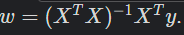\
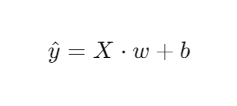

In [6]:
import numpy as np


class LinearRegression:
    def __init__(
        self,
        learning_rate: float = 0.01,
        n_iters: int = 1000,
        l1: float = 0.0,
        l2: float = 0.0,
    ):
        """
        :param learning_rate: Скорость обучения
        :param n_iters: Количество итераций для градиентного спуска
        :param l1: Коэффициент L1 регуляризации (по умолчанию 0)
        :param l2: Коэффициент L2 регуляризации (по умолчанию 0)
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.l1 = l1
        self.l2 = l2

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Регуляризация
            if self.l1 > 0:
                dw += self.l1 * np.sign(self.weights)

            if self.l2 > 0:
                dw += self.l2 * self.weights

            # Обновление параметров
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.dot(X, self.weights) + self.bias


In [9]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# Создание модели линейной регрессии
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X, y)

# Предсказания
predictions = regressor.predict(X)
print("Predictions:", predictions)


Predictions: [1.03425405 2.02113149 3.00800893 3.99488637 4.9817638 ]


## Logistic Regression

In [11]:
class LogisticRegression:
    def __init__(self, n_iters: int = 1000, learning_rate: float = 0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Вычисление сигмоидной функции.
        :param z: Линейная комбинация входных данных
        :return: Значение сигмоидной функции
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        self.bias = 0

        for _ in range(self.n_iters):
            # линейная комбинация входных признаков
            linear_model = np.dot(X, self.weights) + self.bias
            # применение сигмоидной функции для получения вероятности
            y_predicted = self.sigmoid(linear_model)

            # вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Обновление весов и смещения

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Возвращает предсказанные вероятности принадлежности к классу 1.
        :param X: Матрица признаков для предсказаний
        :return: Вектор предсказанных вероятностей
        """
        linear_model = np.dot(X, self.weights) + self.bias

        return self.sigmoid(linear_model)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Возвращает предсказанные классы (0 или 1) на основе вероятности.
        :param X: Матрица признаков для предсказаний
        :return: Вектор предсказанных классов (0 или 1)
        """
        y_predicted_proba = self.predict_proba(X)
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_proba]
        return np.array(y_predicted)


In [12]:
# Генерация данных (пример бинарной классификации)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 0, 1, 1])

# Создание модели логистической регрессии
classifier = LogisticRegression(learning_rate=0.1, n_iters=1000)
classifier.fit(X, y)

# Предсказания
predictions = classifier.predict(X)
print("Predicted classes:", predictions)
probabilities = classifier.predict_proba(X)
print("Predicted probabilities:", probabilities)


Predicted classes: [0 0 0 0 0]
Predicted probabilities: [-0. -0. -0. -0. -0.]


C:\Users\Иван\AppData\Local\Temp\ipykernel_4392\4231529503.py:9: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1 - np.exp(-z))
